<a href="https://colab.research.google.com/github/dssp-ethz/DSSP-Illustrations/blob/main/DSSP_From_Discrete_Time_to_Continuous_Time_and_Back.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling Theorem

## Problem 2.6 (as of 2020)

Let $F(i2\pi f) = \begin{cases} 1 - |f|/f_0 & |f| < f_0\\ 0 & \text{otherwise}\end{cases}$

Sketch the spectrum $F_s(e^{i \Omega})$ of the sampled signal $f_s [k] = T f(kT)$ for 

1.   $T = 1/(2f_0) \ \iff f_s = 2 f_0$
2.   $T = 1/(\frac{3}{2}f_0) \iff f_s = \frac{3}{2} f_0$
3.   $T = 1/(f_0) \ \ \ \iff f_s = f_0$

$Y_s(z) = \sum\limits_{s\in\mathbb{C} : e^{sT} = z} Y(s) \qquad$ (2.48 in lecture notes)




In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

#read in parameters
f_0G = 10
f_sG = 1.5
def update_parameters(f_0, f_s):
  global f_0G, f_sG
  f_0G, f_sG = f_0, f_s * f_0 #multiples of f_0
widgets.interact(update_parameters, f_0 = widgets.IntSlider(min=1, max=20, value=10), f_s = widgets.FloatSlider(min=1, max=2.5, value=1.5))

#Important Stuff
################################################################################
#example spectrum, unless specified f_0 is at 10 Hz
def F(f, f_0):
  if abs(f) > f_0:
    return 0
  else:
    return 1 - np.abs(f)/f_0

def F_s(Omega, f_s, f_0):
  f = Omega*f_s/(2*np.pi)
  s = 0
  #F_s(Omega) = sum_{n\in Z} F(i*(Omega+n*2pi))
  for n in range(-20, 20):#only some of the frequency spectrum will be summed over for computational reasons
    s += F(f+n*f_s, f_0)
  return s

#example signal in time domain
def f(t, f_0):
  return f_0*np.sinc(f_0*t)**2 #IFT of F

#reconstructed signal (with potential aliasing) in time domain
def f_r(t, f_0, f_s):
  s = 0
  for k in range(-20, 20):#only some of the samples will be summed over for computational reasons
    s += f(k/f_s, f_0)*np.sinc(t*f_s-k)
  return s
################################################################################

#range to display
f_values = np.linspace(-2*f_0G,2*f_0G,100)
Omega_values = np.linspace(-3*np.pi, 3*np.pi, 100)
t_values = np.linspace(-0.7, 0.7, 150)**3

#drawing plots
def plot():
  y_values = [F(f, f_0G) for f in f_values]
  y2_values = [F_s(Omega, f_sG, f_0G) for Omega in Omega_values]

  fig = plt.figure(figsize=(20, 8))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_xlabel('$f$', fontsize=14)
  ax1.set_ylabel('$F(2\pi\ i\ f)$', fontsize=14)
  ax1.axis(xmin=f_values[0], xmax=f_values[-1], ymin=0, ymax=1.5)
  ax1.plot(f_values, y_values, alpha=0.5, marker='o', markersize=8);

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_xlabel('$\Omega$', fontsize=14)
  ax2.set_ylabel('$F_s(e^{i\Omega})$', fontsize=14)
  ax2.axis(xmin=Omega_values[0], xmax=Omega_values[-1], ymin=0, ymax=1.5)
  ax2.plot(Omega_values, y2_values, alpha=0.5, marker='o', markersize=8);

def plot_time():
  y_values = [f(t, f_0G) for t in t_values]
  y2_values = [f_r(t, f_0G, f_sG) for t in t_values]

  fig = plt.figure(figsize=(20, 8))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_xlabel('$t$', fontsize=14)
  ax1.set_ylabel('$f(t)$', fontsize=14)
  ax1.axis(xmin=t_values[0], xmax=t_values[-1])
  ax1.plot(t_values, y_values, alpha=0.5, marker='o', markersize=8);

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_xlabel('$t$', fontsize=14)
  ax2.set_ylabel('$f_s(t)$', fontsize=14)
  ax2.axis(xmin=t_values[0], xmax=t_values[-1])
  ax2.plot(t_values, y2_values, alpha=0.5, marker='o', markersize=8);

interactive(children=(IntSlider(value=10, description='f_0', max=20, min=1), FloatSlider(value=1.5, descriptio…

$f_0$ can be set in Hertz while $f_s$ is a multiple of $f_0$ (also set with slider).

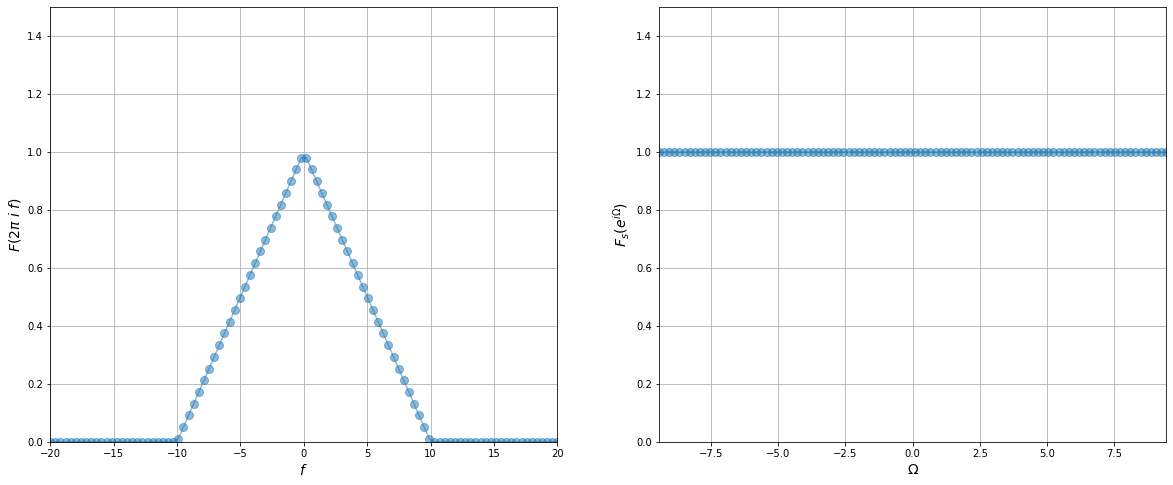

In [8]:
plot()

Having seen the effect on the spectrum you may wonder how the time domain changes if aliasing occurs. You might only see subtle changes in this waveform (try the extreme $f_s = 1\cdot f_0$).

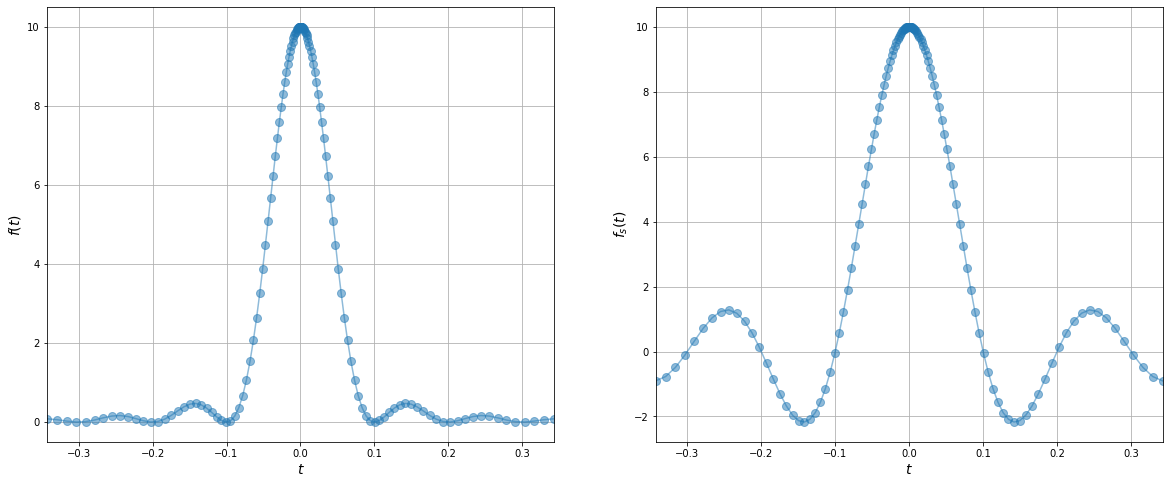

In [9]:
plot_time()

# FIR Filters vs IIR Filters

## FIR Filter design with Han windows

We follow the example on page 57 in the lecture notes (as of 2020)

We wish to design an ideal discrete-time lowpass filter with frequency response $H(e^{i\Omega}) = \begin{cases} 1 & |\Omega | < \Omega_c\\ 0 & otherwise \end{cases}$. 

Using the inversion formula we get in the time domain $h[k] = \frac{\sin(\Omega_c k)}{\pi k}$. You may notice that $h$ is unstable and thus not suitable in real world applications. To the rescue comes the Hann window function (here for even $N$) given by $w[k] = \begin{cases} \frac{1}{2}(1+\cos(\frac{2\pi k}{N+2}) & |k| \leq \frac{N}{2}\\ 0 & |k| > \frac{N}{2}\end{cases}$. Multiplication of $h$ by $w$ yields a bounded finite-duration signal, which is stable. Nicely $W(\Omega)$ is "almost" a dirac delta function, thus $H(\Omega) * W(\Omega) \approx H(\Omega)$, so the low-pass filter is minimally distorted. A subsequent normalization gives a unit amplification in the passband. We get for the final filter $h_w[k] = \frac{h[k] w[k]}{\sum\limits_{n\in\mathbb{Z}} h[n] w[n]}$. If we wish to have a causal filter we may delay our result to get $g[k] = h_w[k-N/2]$.

In [12]:
pip install pydsm

     |████████████████████████████████| 552kB 5.7MB/s 
  Created wheel for pydsm: filename=pydsm-0.14.0.0-cp37-cp37m-linux_x86_64.whl size=684622 sha256=c3c6409832e9b800ab70ad8c579aad7e46335dff7337f97959793cf5c3568c16
  Stored in directory: /root/.cache/pip/wheels/7d/10/8c/8983ab80da463bab42f455c100dbf62c47fba0b6650f6c22f6
Successfully built pydsm


In [172]:
import ipywidgets as widgets
import numpy as np
from pydsm.ft import dtft
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

#Important Stuff
################################################################################
def H(Omega, Omega_c):
  if np.abs(Omega) < Omega_c:
    return 1
  else:
    return 0

def h(k, Omega_c):
  if k == 0:
    return Omega_c/np.pi
  else:
    return np.sin(Omega_c*k)/(np.pi*k)

def w(k, N):#returns single value w[k]
  assert N % 2 == 0, "N should be even"
  if np.abs(k) > N/2:
    return 0
  else:
    return (1+np.cos((2*np.pi*k)/(N+2)))/2

def W(N):#returns callable function of frequency
  assert N % 2 == 0, "N should be even"
  k_values = np.arange(-N/2, N/2+1)
  w_values = [w(k, N) for k in k_values]
  return dtft(w_values, fs=2*np.pi, t0=N/2) #sets f_s such that f=Omega, sets k=0 to center of han window

def h_w(k, Omega_c, N):
  assert N % 2 == 0, "N should be even"
  normalisation = np.sum([h(k, Omega_c)*w(k, N) for k in np.arange(-N/2,N/2+1)])
  return h(k, Omega_c)*w(k, N)/normalisation

def H_w(Omega_c, N):
  k_values = np.arange(-N/2, N/2+1)
  h_w_values = [h_w(k, Omega_c, N) for k in k_values]
  return dtft(h_w_values, fs=2*np.pi, t0=N/2) #sets f_s such that f=Omega, sets k=0 to center result

################################################################################

#read in parameters
NG = 10
Omega_cG = np.pi/2
def update_parameters(N, Omega_c):
  global NG, Omega_cG
  NG, Omega_cG = N, Omega_c
widgets.interact(update_parameters, N = widgets.IntSlider(min=2, max=20, value=10, step=2), Omega_c = widgets.FloatSlider(min=0, max=np.pi, value=np.pi/2))

#drawing plots
def plot2():
  Omega_values = np.linspace(-np.pi, np.pi,100)
  k_values = np.arange(-10, 10)

  H_values = [H(Omega, Omega_cG) for Omega in Omega_values]
  h_values = [h(k, Omega_cG) for k in k_values]
  W_values = np.abs([W(NG)(Omega) for Omega in Omega_values])#should be real and positive, however some error in calculations
  w_values = [w(k, NG) for k in k_values]

  H_w_values = np.abs([H_w(Omega_cG, NG)(Omega) for Omega in Omega_values])#should be real and positive, however some error in calculations
  h_w_values = [h_w(k, Omega_cG, NG) for k in k_values]

  G_values = H_w_values #same amplitude
  g_values = [h_w(k-NG/2, Omega_cG, NG) for k in k_values]

  fig = plt.figure(figsize=(20, 8))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_xlabel('$\Omega$', fontsize=14)
  ax1.axis(xmin=Omega_values[0], xmax=Omega_values[-1], ymin=0, ymax=6)
  ax1.plot(Omega_values, W_values, 'b', alpha=0.5, markersize=8);
  ax1.plot(Omega_values, H_values, 'r', alpha=0.5, markersize=8);
  ax1.legend(['$W(\Omega)$', '$H(\Omega)$'])

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_xlabel('$k$', fontsize=14)
  ax2.axis(xmin=-10, xmax=10, ymin=0, ymax=1.5)
  ax2.stem(k_values, w_values, linefmt='b:', markerfmt='bo', use_line_collection=True);
  ax2.stem(k_values, h_values, linefmt='r:', markerfmt='ro', use_line_collection=True);
  ax2.legend(['$w[k]$', '$h[k]$'])

  fig2 = plt.figure(figsize=(20, 8))

  ax2_1 = fig2.add_subplot(1, 2, 1)
  ax2_1.grid()
  ax2_1.set_xlabel('$\Omega$', fontsize=14)
  ax2_1.axis(xmin=Omega_values[0], xmax=Omega_values[-1], ymin=0, ymax=6)
  ax2_1.plot(Omega_values, H_w_values, 'b', alpha=0.5, markersize=8);
  ax2_1.plot(Omega_values, G_values, 'r:', alpha=0.5, markersize=8);
  ax2_1.legend(['$H_w(\Omega)$', '$G(\Omega)$'])

  ax2_2 = fig2.add_subplot(1, 2, 2)
  ax2_2.grid()
  ax2_2.set_xlabel('$k$', fontsize=14)
  ax2_2.axis(xmin=-10, xmax=10, ymin=0, ymax=1.5)
  ax2_2.stem(k_values, h_w_values, linefmt='b:', markerfmt='bo', use_line_collection=True);
  ax2_2.stem(k_values, g_values, linefmt='r:', markerfmt='ro', use_line_collection=True);
  ax2_2.legend(['$h_w[k]$', '$g[k]$'])


interactive(children=(IntSlider(value=10, description='N', max=20, min=2, step=2), FloatSlider(value=1.5707963…

You may set the specifications for the lowpass filter with Omega_c $(\Omega_c)$ and the fidelity of the Han filter with $N$. The higher $N$ the more the frequency response of $w$ approaches a dirac-delta function at the cost of a wider duration (time domain). Additionally you can see the effect on the convolution of the low pass with the Han window, the wider the window the fewer distortions occur in the frequency domain. The shifted filter $g$ shows the same amplitude response, is however causal in the time domain.

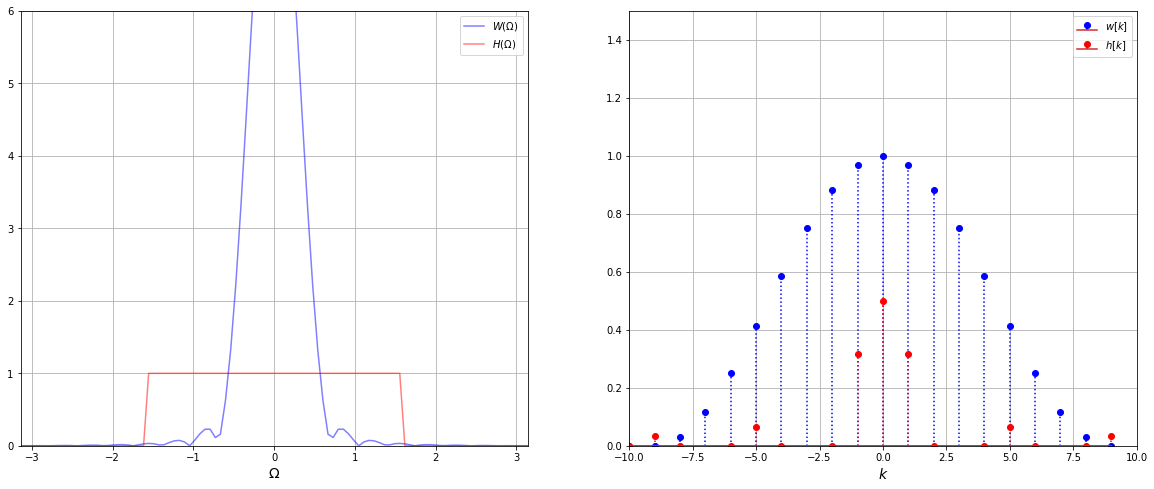

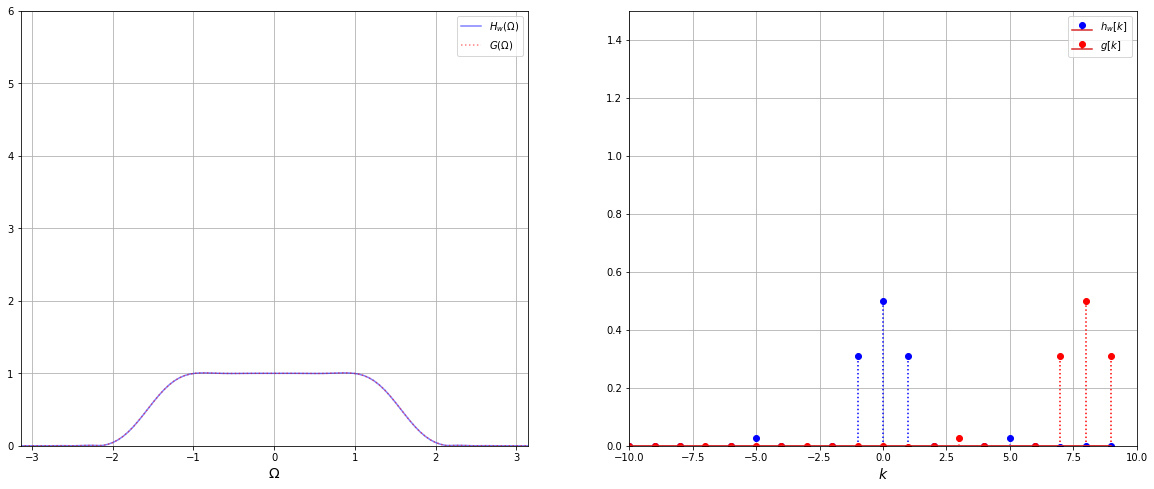

In [174]:
plot2()

## IIR Filter design